Machine Learning with `sklearn`
====

This is mostly a tutorial to illustrate how to use `scikit-learn` to perform common machine learning pipelines. It is NOT meant to show how to do machine learning tasks well - you should take a machine learning course for that.

In [1]:
%matplotlib inline
import itertools as it
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

Resources
----

[Official scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)

Example
----

We will try to separate rocks from mines using this [data set](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks).

From the description provided:
```
Data Set Information:

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock. 

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp. 

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.
```

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', header=None, prefix='X')

In [3]:
df.shape

(208, 61)

#### The last column are labels - make it a category

In [4]:
df.rename(columns={'X60':'Label'}, inplace=True)
df.Label = df.Label.astype('category')

In [5]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X51,X52,X53,X54,X55,X56,X57,X58,X59,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Exploratory data analysis
----

We can use simple plots to get some idea of what the data looks like 

- Is the separation between rocks and mines obvious?
- How correlated are the variables?
- Do we need to standardize?
- Are there outliers?

In [6]:
from pandas.tools.plotting import andrews_curves, parallel_coordinates

### Is there a clear separation between rocks and mines?

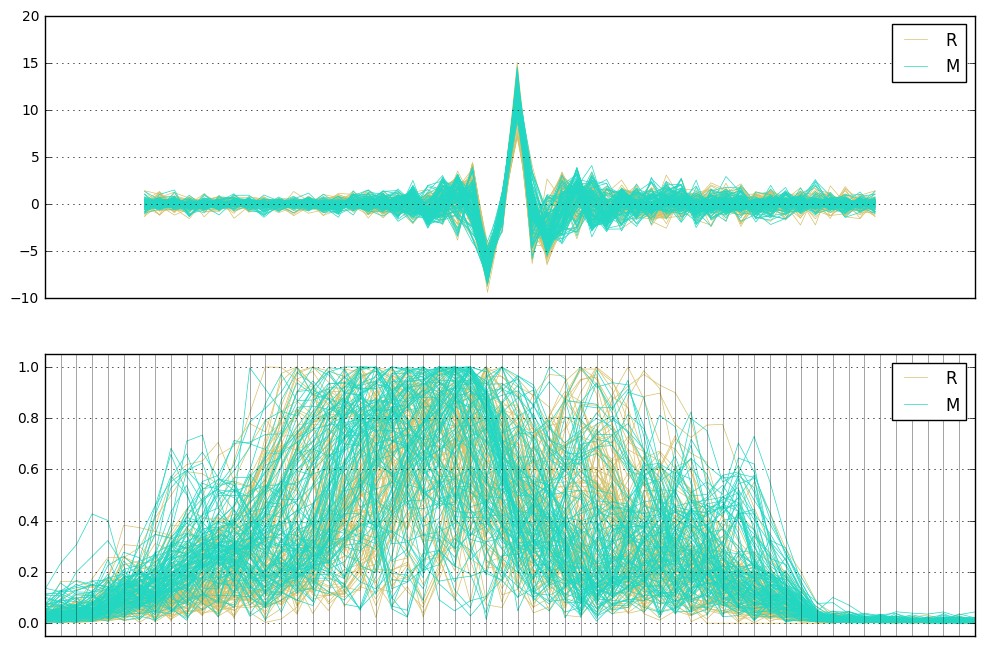

In [7]:
fig, axes = plt.subplots(2,1,figsize=(12,8))
andrews_curves(df, 'Label', samples=50, linewidth=0.5, ax=axes[0])
axes[0].set_xticks([])
parallel_coordinates(df, 'Label', linewidth=0.5, ax=axes[1], 
                     axvlines_kwds={'linewidth': 0.5, 'color': 'black', 'alpha':0.5})
axes[1].set_xticks([])
axes[1].margins(0.05)
pass

### Visualize separation, clustering and outliers wtih MDS

In [8]:
from sklearn.manifold import MDS

In [9]:
mds = MDS(n_components=2)

In [10]:
mds_data = mds.fit_transform(df.ix[:, :-1])

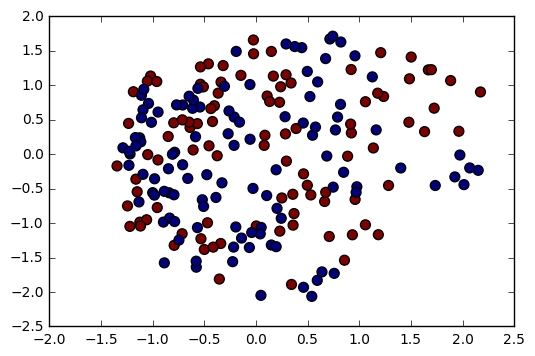

In [11]:
plt.scatter(mds_data[:, 0], mds_data[:, 1], c=df.Label.cat.codes, s=50);

### How correlated are the 60 columns?

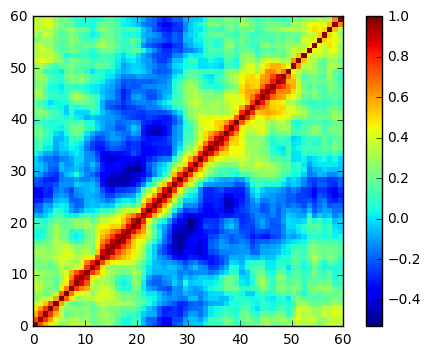

In [12]:
heatmap = plt.pcolor(df.corr(), cmap='jet')
plt.colorbar(heatmap)
plt.gca().set_aspect('equal')

### Are the variables on the same scale? Are there outliers?

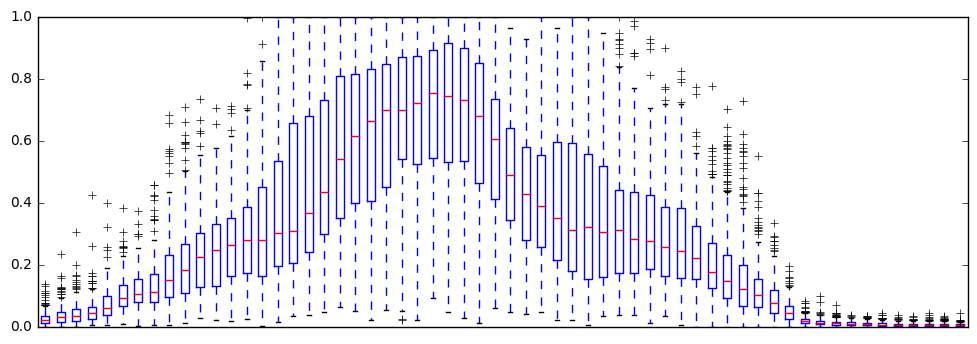

In [13]:
df.plot.box(figsize=(12,4), xticks=[])
pass

### What does the distribution of each variable look like?

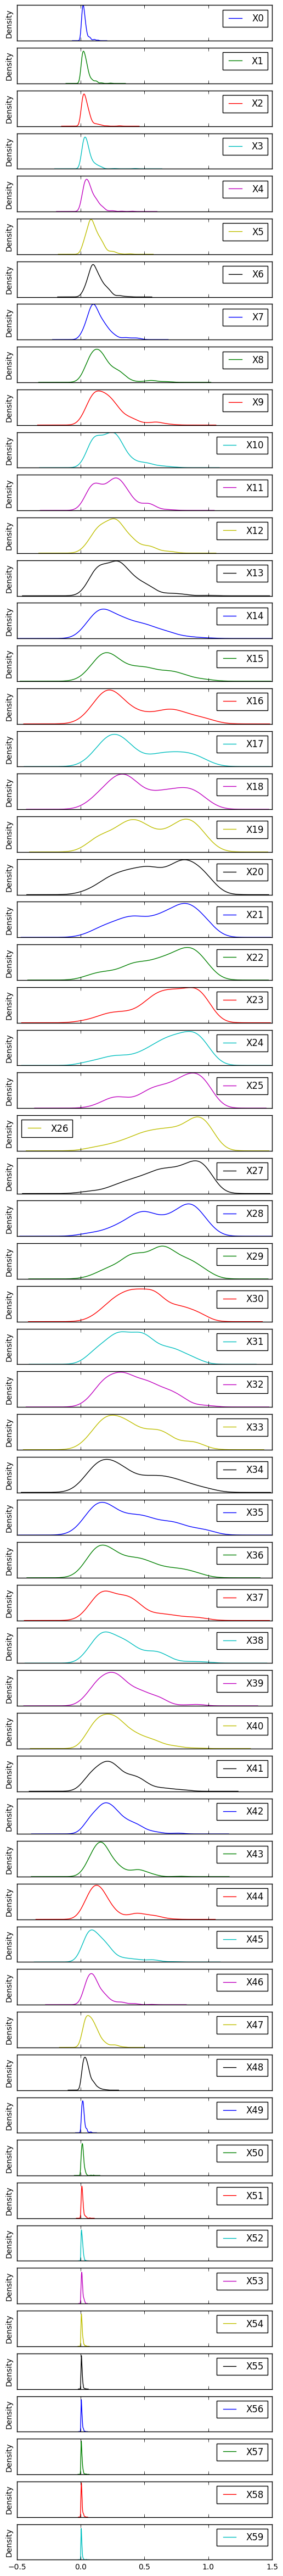

In [14]:
df.plot.density(figsize=(6, 60), subplots=True, yticks=[])
pass

Preprocessing
----

#### Box plots suggest we should standardize the data

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [16]:
data, labels = df.ix[:, :-1], df.ix[:, -1]

In [17]:
data.head(3)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078


In [18]:
data_scaled = DataFrame(StandardScaler().fit_transform(data), columns=data.columns)

In [19]:
data_scaled.head(3)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,...,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,...,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,...,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582


#### If there are gross outliers, we can use a robust routine

In [20]:
data_robust = DataFrame(RobustScaler().fit_transform(data), columns=data.columns)

In [21]:
data_robust.head(3)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59
0,-0.126126,0.200000,0.217949,-0.581931,0.528726,0.096125,0.642271,0.538267,1.163123,0.182309,...,0.750000,-0.920635,-0.310433,0.723288,-0.037736,1.595142,1.791822,0.385185,0.390977,-0.387097
1,1.013514,0.682540,1.282051,0.619315,0.896746,2.476155,1.486320,2.646482,1.330279,0.665714,...,-0.112903,-0.317460,-0.066158,-0.493151,0.238994,1.983806,1.197026,-0.133333,-0.180451,-0.165899
2,0.153153,0.869841,1.938462,1.601246,0.560868,2.024590,1.862517,2.971685,2.987903,2.775925,...,-0.854839,1.248677,0.717557,0.021918,1.320755,2.842105,3.814126,1.570370,0.466165,0.460829


Dimension reduction
----

In [22]:
from sklearn.decomposition import PCA

In [23]:
data.shape

(208, 60)

In [24]:
pca = PCA()
data_scaled_pca = DataFrame(pca.fit_transform(data_scaled), columns=data.columns)

In [25]:
data_scaled.shape

(208, 60)

In [26]:
v = pca.explained_variance_ratio_
vc = v.cumsum()
DataFrame(list(zip(it.count(), v, vc)), columns=['pc', 'explained', 'cumsum']).head(10)

,pc,explained,cumsum
0,0,0.203466,0.203466
1,1,0.188972,0.392438
2,2,0.085500,0.477938
3,3,0.056792,0.534730
4,4,0.050071,0.584800
5,5,0.040650,0.625450
6,6,0.032790,0.658240
7,7,0.030465,0.688705
8,8,0.025660,0.714364
9,9,0.024911,0.739275


#### Let's just use the principal components that explain at least 95% of total variance

In [27]:
n_comps = 1 + np.argmax(vc > 0.95) 
n_comps

30

In [28]:
data_scaled_pca = data_scaled_pca.ix[:, :n_comps]
data_scaled_pca.shape

(208, 30)

In [29]:
data_scaled_pca.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29
0,1.921168,-1.370893,-1.666476,0.837913,-1.057324,1.712504,1.785716,-1.581264,0.335418,-1.028065,...,-1.208238,0.723202,0.304876,0.120470,-0.458567,-0.021847,-1.089710,0.096606,0.168123,-0.753434
1,-0.480125,7.586388,-1.275734,3.859346,2.121112,-2.186818,-1.742764,1.517061,0.307933,-1.341882,...,-2.388110,0.021429,-0.145524,-0.246021,0.117770,0.704112,-0.052387,-0.240064,-0.178744,-0.554605
2,3.859228,6.439860,-0.030635,5.454599,1.552060,1.181619,-1.820138,-1.495929,-1.152459,-1.006030,...,-1.740823,-2.000942,-0.295682,1.931963,0.758036,-0.113901,0.964319,0.214707,0.527529,-0.033003
3,4.597419,-3.104089,-1.785344,-1.115908,-2.785528,-2.072673,2.084530,1.707289,0.452390,-1.117318,...,-0.685825,1.307367,-0.662918,1.142591,-0.352601,-0.491193,-0.061186,0.150725,1.389191,0.642030
4,-0.533868,1.849847,-0.860097,3.302076,2.808954,-0.783945,0.362657,0.812621,0.184578,-0.023594,...,0.503340,0.258970,0.253982,1.199262,-0.165722,-0.041342,-0.589311,-0.500720,-1.549835,-0.783667


In [30]:
df_pca = pd.concat([data_scaled_pca, labels], axis=1)
df_pca.shape

(208, 31)

Classification
----

### Create test and training data sets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = \
  train_test_split(data_scaled_pca, labels, test_size=0.33, random_state=42)

### Using logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Accuracy score

In [36]:
lr.score(X_test, y_test)

0.78260869565217395

### Using Support Vector Classifier and Grid Search

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [38]:
parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
               'C': [1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#### Do grid search with parallel jobs

In [39]:
clf = GridSearchCV(SVC(C=1), parameters, cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(X_train, y_train.codes)
pass

In [40]:
clf.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [41]:
clf.best_score_

0.76978417266187049

In [42]:
clf.score(X_test, y_test.codes)

0.88405797101449279

In [43]:
from sklearn.metrics import classification_report

In [44]:
y_true, y_pred = y_test.codes, clf.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90        38
          1       0.90      0.84      0.87        31

avg / total       0.88      0.88      0.88        69



### Using a Random Forests Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
X_train, X_test, y_train, y_test = \
  train_test_split(data_scaled, labels, test_size=0.33, random_state=42)

In [47]:
parameters = [{'n_estimators': list(range(25, 201, 25)),
               'max_features': list(range(2, 15, 2))}]
clf = GridSearchCV(RandomForestClassifier(), parameters, 
                   cv=5, scoring='accuracy', n_jobs=-1)
clf.fit(X_train, y_train.codes)
pass

In [48]:
clf.best_params_

{'max_features': 6, 'n_estimators': 150}

In [49]:
clf.score(X_test, y_test.codes)

0.85507246376811596

#### Which features are important?

In [50]:
imp = clf.best_estimator_.feature_importances_
idx = np.argsort(imp)

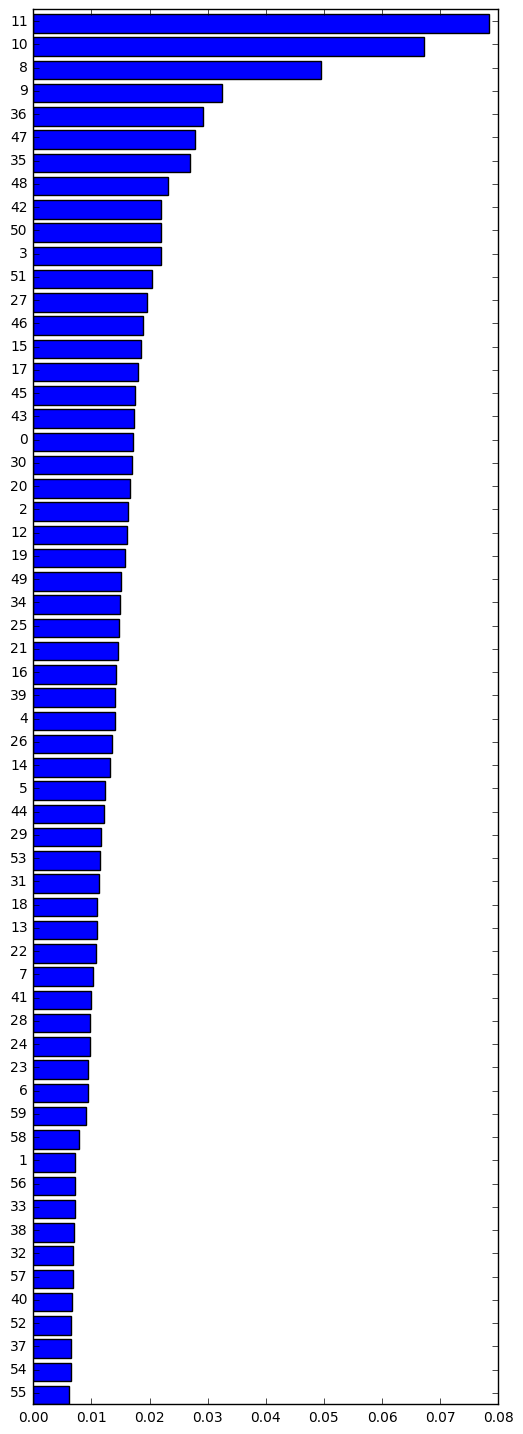

In [51]:
plt.figure(figsize=(6, 18))
plt.barh(range(len(imp)), imp[idx])
plt.yticks(np.arange(len(imp))+0.5, idx)
pass

Using a Pipeline
----

For cross-validation (e.g. grid search for best parameters), we often need to chain a series of steps and treat it as a single model. This chaining can be done with a Pipeline object.

In [52]:
from sklearn.pipeline import Pipeline

In [53]:
X_train, X_test, y_train, y_test = \
  train_test_split(data_scaled, labels, test_size=0.33, random_state=42)

In [54]:
scaler = StandardScaler()
pca = PCA()
clf = LogisticRegression()

pipe = Pipeline(steps=[('scaler', scaler), ('pca', pca), ('clf', clf)])
n_components = [20, 30, 40, 50, 60]
Cs = np.logspace(-4, 4, 1)

estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components,
                         clf__C=Cs), n_jobs=-1)
estimator.fit(X_train, y_train.codes)
pass

In [55]:
estimator.best_estimator_.named_steps['pca'].n_components

30

In [56]:
estimator.score(X_test, y_test.codes)

0.76811594202898548

In [57]:
y_true, y_pred = y_test.codes, estimator.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.71      0.77        38
          1       0.70      0.84      0.76        31

avg / total       0.78      0.77      0.77        69

